In [56]:
# Importing the libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
plt.style.use('ggplot')

# Importing the dataset
dataset = pd.read_csv('dataset2.csv')
dataset.head()
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

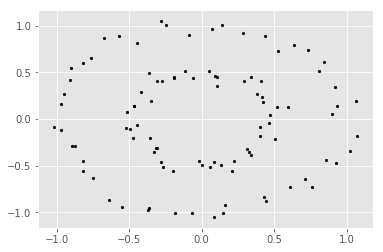

In [57]:
data = np.array(list(zip(X, y)))
plt.scatter(X, y, c='black', s=7)
plt.show()

#Z = np.zeros(len(data))

In [109]:
var = 0.3

def RbfKernel(data1, data2, sigma):
    squaredEuclidean = np.linalg.norm(data1 - data2)
    result = np.exp(-(squaredEuclidean)/(2*sigma**2))
    return result

def thirdTerm(memberCluster, Z1):
    zkj = 0
    zmj = 0

    term3 = [[0],[0]]
    for i in range(0, memberCluster.shape[0]):
        zkj = zkj + Z1[i][0]
        for j in range(0, memberCluster.shape[0]):
            term3[0][0] = term3[0][0] + RbfKernel(memberCluster[i, :], memberCluster[j, :], var)*Z1[i][0]*Z1[j][0]
            term3[1][0] = term3[1][0] + RbfKernel(memberCluster[i, :], memberCluster[j, :], var)*Z1[i][1]*Z1[j][1]
            
    term3[0][0] = term3[0][0] / (zkj ** 2)
    term3[1][0] = term3[1][0] / ((100-zkj) ** 2)
    
    return term3

def secondTerm(dataI, memberCluster, Z2):
    zkj = 0
    term2 = [[0],[0]]
    for i in range(0, memberCluster.shape[0]):
        zkj = zkj + Z2[i][0]
        term2[0][0] = term2[0][0] + RbfKernel(dataI, memberCluster[i, :], var)*Z2[i][0]
        term2[1][0] = term2[1][0] + RbfKernel(dataI, memberCluster[i, :], var)*Z2[i][1]
        
    term2[0][0] = 2 * term2[0][0] / zkj
    term2[1][0] = 2 * term2[1][0] / (100-zkj)

    return term2

In [ ]:
Z_list = []
for i in range (len(data)):
    m = random.randint(0,1)
    Z_list.append([m ,1-m])
    
Z_pre=[]
for i in range (len(data)):
    m = random.randint(0,1)
    Z_pre.append([m ,1-m])
    
distances = [[0],[0]]

while True:
    #Z_new=[]
    #for i in range (len(data)):
        #n = random.randint(0,1)
        #Z_new.append([n ,1-n])
        
    #print(Z_list)
    
    term3 = thirdTerm(data, Z_list)
    for i in range(len(data)):
        
        distances[0][0] = RbfKernel(data[i], data[i], var) - secondTerm(data[i], data, Z_list)[0][0] + term3[0][0]
        distances[1][0] = RbfKernel(data[i], data[i], var) - secondTerm(data[i], data, Z_list)[1][0] + term3[1][0]

        #if distances[0][0] < distances[1][0]:
            #Z_new[i][0] = 1
            #Z_new[i][1] = 0
        #else :
            #Z_new[i][0] = 0
            #Z_new[i][1] = 1
            
        if distances[0][0] < distances[1][0]:
            Z_list[i][0] = 1
            Z_list[i][1] = 0
        else :
            Z_list[i][0] = 0
            Z_list[i][1] = 1
        
    #if Z_pre==Z_new:
        #break
        
    #print(Z_list)
    
    if Z_pre==Z_list:
        break
        
    #Z_pre = deepcopy(Z_new)
    #Z_list = deepcopy(Z_new)
    
    #Z_pre = deepcopy(Z_list)
    for i in range(len(Z_list)):
        Z_pre[i][0] = Z_list[i][0]
        Z_pre[i][1] = Z_list[i][1]
    
    #print(Z_pre, Z_list)
    
#print(Z_list)

In [ ]:
k=2
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if Z_list[j][0] == i])
        #print(points)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        #print(len(points[:, 1]), len(points[:, 0]))
plt.show()

In [65]:
def rbf(x1,x2,lam):
    return np.exp(-lam*np.linalg.norm(x1-x2)**2)

def linear(x1,x2):
    return np.linalg.norm(x1-x2,ord=1)

def quadratic(x1,x2):
    return np.linalg.norm(x1-x2)**2

def kernel_matrix(p,method,lam):
    K=[]
    for i in range(len(p)):
        l=[]
        for j in range(len(p)):
            if method=='rbf':
                l.append(rbf(p[i],p[j],lam))
            if method=='linear':
                l.append(linear(p[i],p[j]))
            if method=='quadratic':
                l.append(quadratic(p[i],p[j]))
        K.append(l)
    return K

In [75]:
#kernel k-means
def kernel_kmeans(p,method,lam,max_iter=20):
    '''
        p:dataset
        method : 'rbf'
                'linear'
                'quadratic'
        lam : used in 'rbf'
        max_iter : if not converge until number of epoch reaching this value, the algorithm will stop
    '''
    K=kernel_matrix(p,method,lam)
    z=[]
    for i in range(len(p)):
        m=random.randint(0,1)
        z.append([m,1-m])
    code=1
    num=0
    while code==1:
        code=0
        s2=[0,0]
        n=[0,0]
        zn=[0 for i in range(len(p))]
        for k in range(len(p)):
            n[0]+=z[k][0]
            n[1]+=z[k][1]
            for j in range(len(p)):
                #print(K[k][j])
                
                #s2[0]+=z[k][0]*z[j][0]*RbfKernel(data[k], data[j], var)
                #s2[1]+=z[k][1]*z[j][1]*RbfKernel(data[k], data[j], var)
                
                s2[0]+=z[k][0]*z[j][0]*K[k][j]
                s2[1]+=z[k][1]*z[j][1]*K[k][j]
        for i in range(len(p)):
            S=[0,0]
            s1=[0,0]
            for k in range(len(p)):
                
                s1[0]+=z[k][0]*K[i][k]
                s1[1]+=z[k][1]*K[i][k]
                
                #s1[0]+=z[k][0]*RbfKernel(data[i], data[k], var)
                #s1[1]+=z[k][1]*RbfKernel(data[i], data[k], var)
                
                
            S[0]=K[i][i]-2*s1[0]/n[0]+s2[0]/(n[0])**2
            S[1]=K[i][i]-2*s1[1]/n[1]+s2[1]/(n[1])**2
            
            #S[0]=RbfKernel(data[i], data[i], var)-2*s1[0]/n[0]+s2[0]/(n[0])**2
            #S[1]=RbfKernel(data[i], data[i], var)-2*s1[1]/n[1]+s2[1]/(n[1])**2
            
            
            if S[0]<S[1]:
                zn[i]=1
            if S[0]>S[1]:
                zn[i]=0
        for i in range(len(p)):
            if zn[i]!=z[i][0]:
                z[i][0]=zn[i]
                z[i][1]=1-zn[i]
                code=1
        num+=1
        if num>max_iter:
            print('Not converge while max_iter reached.')
            break
    return z

In [76]:
ZZZ = kernel_kmeans(data,method='rbf',lam=10,max_iter=20)

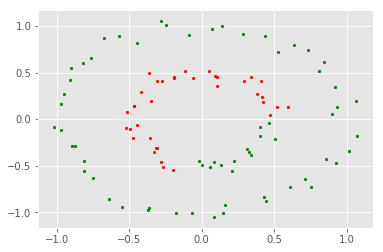

In [77]:
k=2
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if ZZZ[j][0] == i])
        #print(points)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        #print(len(points[:, 1]), len(points[:, 0]))
plt.show()